In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
taxi = pd.read_csv('3_taxi_peru.csv', sep=';')
taxi['start_at']=pd.to_datetime(taxi['start_at'])
taxi['end_at']=pd.to_datetime(taxi['end_at'])
taxi['arrived_at']=pd.to_datetime(taxi['arrived_at'])
taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")

In [13]:
taxi['wait_time'] = taxi.arrived_at - taxi.start_at
taxi['wait_time'] = taxi.wait_time.astype('timedelta64[m]')

In [33]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,7,Saturday
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,10,Saturday
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,9,Tuesday
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,4,Thursday


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd71d3cae48>,)

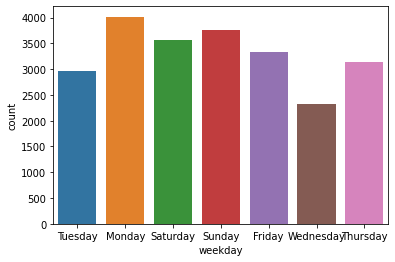

In [32]:
sns.countplot(taxi['weekday']),# order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [37]:
unique_users = taxi.groupby('month', as_index=False).agg({'user_id':'nunique'})
unique_users

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


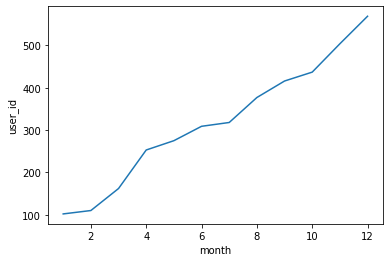

In [39]:
sns.lineplot(unique_users.month, unique_users.user_id)

In [176]:
reserved = taxi.query("start_type == 'reserved'")

In [178]:
latecomers = reserved.query("wait_time > 0.0")

In [170]:
how_many_lateness = latecomers.groupby('driver_id').agg({'wait_time':'count'}, ascending=False)

In [173]:
how_many_lateness.sort_values('wait_time', ascending=False)

,wait_time
driver_id,
406921adcca37705ef527b4246c0cfea,67
d665fb9f75ef5d9cd0fd89479380ba78,59
ec84a73745199ff840ecafcb924383ad,57
56f59b58bcbbd1cdabc3652e713134c2,51
c814db2127582cf95dea1f74f43127c2,45
...,...
d7bf644eb441cda6127f91addebb85c4,1
b68895736389f2949faa8c73555b81ac,1
8cb98e46b27af1e6fca8768a2a6329f3,1
